In [2]:
from tensorflow import keras # high level library built on tensorflow
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

In [22]:
# load the sample mnist dataset 

(Xtrain,ytrain),(Xtest,ytest) = keras.datasets.mnist.load_data()
print(Xtrain.shape)
print(Xtest.shape)
# scale the data 
Xtrain = Xtrain/255
Xtest = Xtest/255

print(Xtest[0,:,:].min(),Xtest[0,:,:].max())

(60000, 28, 28)
(10000, 28, 28)
0.0 1.0


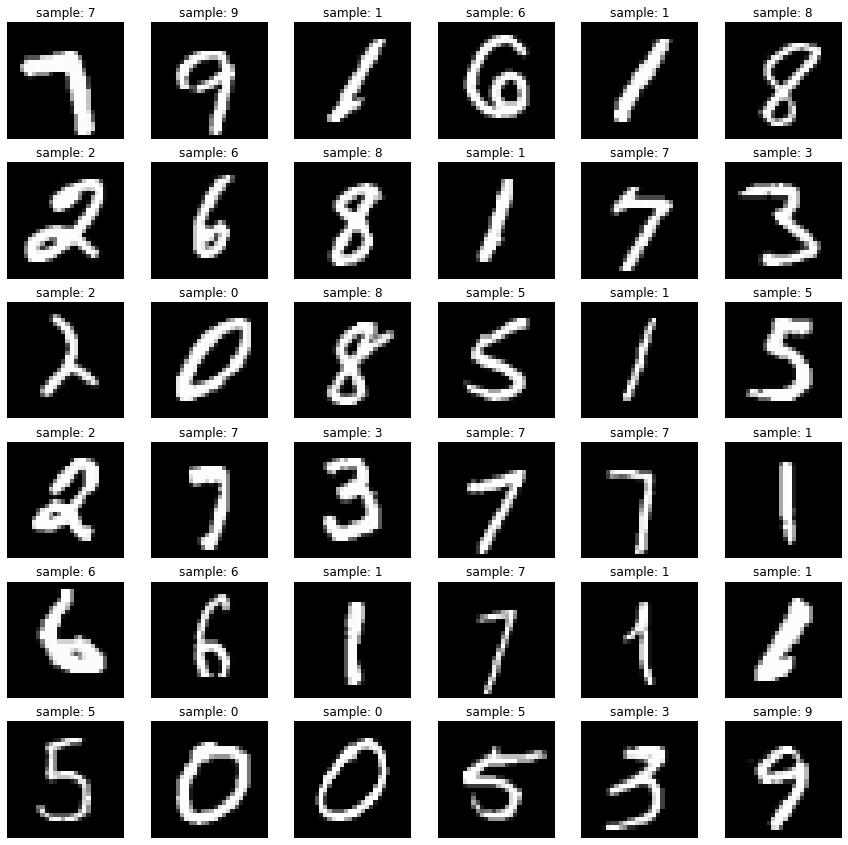

In [23]:
# display any single image of the train sample 

for i in range(1,36+1,1):
  num = np.random.randint(0,60000,size=(1))
  plt.figure(1,figsize=(15,15))
  plt.subplot(6,6,i)
  plt.imshow(Xtrain[num[0],:,:],cmap='gray')
  plt.axis('off')
  plt.title('sample: '+str(ytrain[num[0]]))

In [24]:
num = np.random.randint(0,60000,size=(1))
print(num)
print(np.unique(ytrain))

[14305]
[0 1 2 3 4 5 6 7 8 9]


In [25]:
# create the neural network 
model = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28,1)), # input layer 
                                keras.layers.Dense(300,activation = 'relu'), # hidden layer 1
                                keras.layers.Dense(200,activation = 'relu'), # hiddern layer 2
                                 keras.layers.Dense(10)]) # output layer

In [26]:
loss_func = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer = 'SGD',loss = loss_func,metrics=['accuracy'])


In [27]:
hist = model.fit(Xtrain,ytrain,epochs = 20)


Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.8546
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2796 - accuracy: 0.9205
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2289 - accuracy: 0.9352
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1948 - accuracy: 0.9447
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1699 - accuracy: 0.9512
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1505 - accuracy: 0.9573
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1348 - accuracy: 0.9615
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9653
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1107 - accuracy: 0.9687
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.101

In [28]:
# testing 
[loss_test,accTest] = model.evaluate(Xtest,ytest)
print(("Testing Accuracy: ",accTest))
print("Testing Loss",loss_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9745
('Testing Accuracy: ', 0.9745000004768372)
Testing Loss 0.07779853790998459
